In [1]:
#Step1: select folder
from pathlib import Path

mydir = Path("raw/")
file_list = [] # create an empty list

for file in mydir.iterdir():
    if file.suffix == '.czi':
        file_list.append(str(file)) # append in files in folder with .tif

file_list

['raw\\080423 UOK124 Cont SC35-647 SON-488-01_processed.czi',
 'raw\\080423 UOK124 Cont SC35-647 TFE3-488-02_processed.czi',
 'raw\\080423 UOK124 siSON SC35-647 SON-488-01_processed.czi',
 'raw\\080423 UOK124 siSON SC35-647 TFE3-488-01_processed.czi',
 'raw\\080423 UOK124 siSONsiSRRM SC35-647 SON-488-01_processed.czi',
 'raw\\080423 UOK124 siSONsiSRRM SC35-647 TFE3-488-02_processed.czi']

In [2]:
# import os
# from aicsimageio import AICSImage
# from aicsimageio.writers import OmeTiffWriter
# from pathlib import Path

# img2 = AICSImage("072423 UOK124 siSONsiSRRM2 SC35-647 SON-488-01_processed.czi")
# img2.set_scene(4)

# single_img_data = img2.get_image_data("ZYX",S=8,T=0,C=2)
# img2.dims
# img2.scenes
# import napari
# viewer = napari.view_image(single_img_data)

In [3]:
from aicsimageio import AICSImage

for img in file_list: 
    filename = Path(img).stem
    img2 = AICSImage(img) # Open an czi image in file_list
    img_channels = img2.dims.C
    img_scenes = len(img2.scenes)
    img_time = img2.dims.T
    img2.dims.order
    a = img2.metadata
    first_ten_seconds = img2.xarray_data.loc[:10]
    # print(img_channels,img_scenes,img_time)
    print(first_ten_seconds)


<xarray.DataArray (T: 1, C: 3, Z: 1, Y: 934, X: 934)>
array([[[[[ 10,   9,   9, ...,  12,  11,  10],
          [  9,   9,   9, ...,  14,  13,  12],
          [  6,   7,   8, ...,  16,  14,  13],
          ...,
          [  7,   7,   7, ...,  16,  19,  20],
          [ 12,  12,  12, ...,  11,  15,  16],
          [ 16,  17,  16, ...,   6,   9,  11]]],


        [[[  0,   0,   0, ...,  43,  42,  47],
          [  0,   0,   0, ...,  26,  20,  22],
          [  0,   0,   0, ...,   7,   0,   0],
          ...,
          [  0,   0,   0, ...,   0,   0,   1],
          [  3,   0,   0, ...,   0,   0,   0],
          [  5,   1,   0, ...,   0,   0,   0]]],


        [[[  0,   0,   0, ..., 736, 767, 732],
          [  0,   0,   0, ..., 779, 830, 820],
          [  0,   0,   0, ..., 722, 774, 790],
          ...,
          [ 16,  13,   9, ...,  14,  14,   9],
          [ 11,  11,  15, ...,  16,  17,  12],
          [  2,   5,  16, ...,   9,  10,   7]]]]], dtype=uint16)
Coordinates:
  * C        (C)

In [4]:
import os
from aicsimageio import AICSImage
from aicsimageio.writers import OmeTiffWriter
from pathlib import Path

if not os.path.exists("images"):
    os.makedirs("images")
for img in file_list: 
    filename = Path(img).stem
    img2 = AICSImage(img) # Open an czi image in file_list
    img_channels = img2.dims.C
    img_scenes = len(img2.scenes)
    img_time = img2.dims.T
    print(img_channels,img_scenes,img_time)


    for S in range(img_scenes): #loop through scene by scene (aka positions)
        for T in range(img_time): #loop through time by time
            for C in range(img_channels):
                img2.set_scene(S)
                print(S,T,C)
                single_img_data = img2.get_image_data("ZYX",S=S,T=T,C=C)
                #for two channel image, split C1C2
                #for three channel image, split C1C2C3
                #for four channel image, spliot C1C2C3C4
                if img_channels == 2:
                    file_name = f"{filename}_{os.path.splitext(img)[1]}.S{S+1:03d}.T{T+1:03d}.C{C+1:03d}.ome.tif"
                    OmeTiffWriter.save(single_img_data,f"./images/{file_name}")
                if img_channels == 3:
                    file_name = f"{filename}_{os.path.splitext(img)[1]}.S{S+1:03d}.T{T+1:03d}.C{C+1:03d}.ome.tif"
                    OmeTiffWriter.save(single_img_data,f"./images/{file_name}")
                elif img_channels == 4:
                    file_name = f"{filename}_{os.path.splitext(img)[1]}.S{S+1:03d}.T{T+1:03d}.C{C+1:03d}.ome.tif"
                    OmeTiffWriter.save(single_img_data,f"./images/{file_name}")               



3 10 1
0 0 0
0 0 1
0 0 2
1 0 0
1 0 1
1 0 2
2 0 0
2 0 1
2 0 2
3 0 0
3 0 1
3 0 2
4 0 0
4 0 1
4 0 2
5 0 0
5 0 1
5 0 2
6 0 0
6 0 1
6 0 2
7 0 0
7 0 1
7 0 2
8 0 0
8 0 1
8 0 2
9 0 0
9 0 1
9 0 2
3 21 1
0 0 0
0 0 1
0 0 2
1 0 0
1 0 1
1 0 2
2 0 0
2 0 1
2 0 2
3 0 0
3 0 1
3 0 2
4 0 0
4 0 1
4 0 2
5 0 0
5 0 1
5 0 2
6 0 0
6 0 1
6 0 2
7 0 0
7 0 1
7 0 2
8 0 0
8 0 1
8 0 2
9 0 0
9 0 1
9 0 2
10 0 0
10 0 1
10 0 2
11 0 0
11 0 1
11 0 2
12 0 0
12 0 1
12 0 2
13 0 0
13 0 1
13 0 2
14 0 0
14 0 1
14 0 2
15 0 0
15 0 1
15 0 2
16 0 0
16 0 1
16 0 2
17 0 0
17 0 1
17 0 2
18 0 0
18 0 1
18 0 2
19 0 0
19 0 1
19 0 2
20 0 0
20 0 1
20 0 2
3 16 1
0 0 0
0 0 1
0 0 2
1 0 0
1 0 1
1 0 2
2 0 0
2 0 1
2 0 2
3 0 0
3 0 1
3 0 2
4 0 0
4 0 1
4 0 2
5 0 0
5 0 1
5 0 2
6 0 0
6 0 1
6 0 2
7 0 0
7 0 1
7 0 2
8 0 0
8 0 1
8 0 2
9 0 0
9 0 1
9 0 2
10 0 0
10 0 1
10 0 2
11 0 0
11 0 1
11 0 2
12 0 0
12 0 1
12 0 2
13 0 0
13 0 1
13 0 2
14 0 0
14 0 1
14 0 2
15 0 0
15 0 1
15 0 2
3 21 1
0 0 0
0 0 1
0 0 2
1 0 0
1 0 1
1 0 2
2 0 0
2 0 1
2 0 2
3 0 0
3 0 1
3 0 2
4 0

In [5]:
################################################################################
import cellprofiler_core.pipeline
import cellprofiler_core.preferences
import cellprofiler_core.utilities.java
import pathlib

cellprofiler_core.preferences.set_headless()

In [6]:
cellprofiler_core.utilities.java.start_java()

In [7]:
image_set_list = cellprofiler_core.image.ImageSetList()

image_set = image_set_list.get_image_set(0)

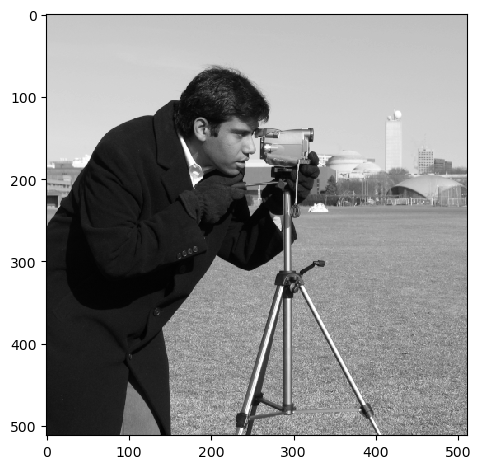

In [8]:
import skimage.data
x = skimage.data.camera()

image_x = cellprofiler_core.image.Image(x)

image_set.add("x", image_x)

skimage.io.imshow(image_set.get_image("x").pixel_data)

In [9]:
object_set = cellprofiler_core.object.ObjectSet()

objects  = cellprofiler_core.object.Objects()

object_set.add_objects(objects, "example")

In [10]:
measurements = cellprofiler_core.measurement.Measurements()

In [11]:
pipeline = cellprofiler_core.pipeline.Pipeline()
pipeline.load("080123.cppipe")

In [12]:
folder_name = 'output'
if not os.path.isdir(folder_name):
    os.makedirs(folder_name)
current_dir = pathlib.Path().absolute()
#print(current_dir)
cellprofiler_core.preferences.set_default_output_directory(f"output")
#[print(setting.to_dict()) for setting in pipeline.modules()[-1].settings()]
file_list = list(pathlib.Path('.').absolute().glob('images\\*.TIF'))
files = [file.as_uri() for file in file_list]
pipeline.read_file_list(files)
output_measurements = pipeline.run()

14-Aug-23 17:21:53 - cellprofiler_core.modules.images - WARNING  - Workspace file list is empty, will populate from pipeline.This may happen if you're running in headless mode.
C:\Users\CaiLab\CellProfiler\cellprofiler\modules\measureobjectintensity.py:441: RuntimeWarning: invalid value encountered in divide
  cmi_x[lindexes - 1] = i_x / integrated_intensity[lindexes - 1]
C:\Users\CaiLab\CellProfiler\cellprofiler\modules\measureobjectintensity.py:442: RuntimeWarning: invalid value encountered in divide
  cmi_y[lindexes - 1] = i_y / integrated_intensity[lindexes - 1]
C:\Users\CaiLab\CellProfiler\cellprofiler\modules\measureobjectintensity.py:443: RuntimeWarning: invalid value encountered in divide
  cmi_z[lindexes - 1] = i_z / integrated_intensity[lindexes - 1]
C:\Users\CaiLab\CellProfiler\cellprofiler\modules\measureobjectintensitydistribution.py:1065: RuntimeWarning: invalid value encountered in divide
  fraction_at_distance = histogram / sum_by_object_per_bin
C:\Users\CaiLab\CellProf